# Fallschirmspringer

Nun soll das Modell des Fallschirmspringers mit Hilfe von Matlab simuliert werden. Dieses Modell wurde bereits mit dem 5-Punkte-Schema zur Simulation mit Simulink betrachtet. Dabei lassen sich die meisten Schritte wiederverwenden. Die Beschreibung des Modells nach dem 5-Punkte-Schema finden Sie unter

https://csiegl.com/mus/07_systematische_modellbildung/index.html#/3

Die Modellskizze aus dem *ersten Schritt* kann selbstverständlich übernommen werden.

![Fallschirmspringer](Fallschirmspringer.png)

Im *zweiten Schritt* werden die Zustandsgleichung betrachtet. Hier wird nicht die integrale Form benötigt, sondern die differentielle Form mit den jeweiligen Ableitungen nach der Zeit. Die beiden Zustandsgleichungen lauten somit

$$F_B(t) = m \cdot a(t) = m \cdot \dot{v}(t) = m \cdot \ddot{h}(t)$$

Die Bilanzgleichungen des *dritten Schrittes* bleiben wiederum erhalten. Hier haben wir eine Bilanzgleichung, nämlich das Kräftegleichgewicht.

$$F_B(t) = -F_G - F_L(t)$$

Auch die beiden statischen Grundbeziehungen des *vierten Schrittes* können wiederverwendet werden.

$$F_G = m \cdot g$$

$$F_L = \frac{1}{2}c_wA\rho_Lv^2(t) \cdot \text{sign}(v(t))$$

Ein Blockschaltbild wird hier nicht benötigt. Allerdings lassen sich alle oben genannten Gleichungen in die Zustandsfunktion `xpunkt_fallschirmspringer(t, x)` implementieren. Da es sich hier um ein System zweiter Ordnung handelt hat der Zustandsvektor x zwei Elemente:

$$\mathbf{x}(t) = \begin{bmatrix} h(t) \\ v(t) \end{bmatrix}$$

Erzeugen Sie nun einen Plot, in dem die Höhe des Fallschirmspringers über der Zeit dargestellt wird. Gehen Sie dazu folgendermaßen vor:

1. Vervollständigen Sie die Funktion `xpunkt_fallschirmspringer()` mit den Gleichungen der Schritte *zwei* bis *vier*.
2. Verwenden Sie die Parameter $m = 70\text{ kg}$, $g = 9.81\text{ m/s}^2$, $c_w = 1$ und $\rho_L = 1\text{ kg/m}^3$. Die Angriffsfläche des Fallschirms soll zunächst $A = 1\text{ m}^2$ betragen, d.h. der Fallschirm ist geschlossen. Unter einer Höhe $h(t) = 1000\text{ m}$ öffnet sich der Fallschirm und die Angriffsfläche beträgt $A = 20\text{ m}^2$.
3. Sobald der Fallschirmspringer die Höhe $h(t) = 0$ erreicht hat ändert sich seine Höhe nicht mehr.
4. Simulieren Sie diese Funktion mit `ode45()` im Bereich zwischen $t = 0 \ldots 160\text{ s}$. Der Fallschirmspringer verlässt das Flugzeug bei $h_0 = 2000\text{ m}$ und besitzt dabei keine Geschwindigkeit.
5. Legen Sie den Verlauf der Höhe über der Zeit in der Variablen h ab und plotten Sie diese.

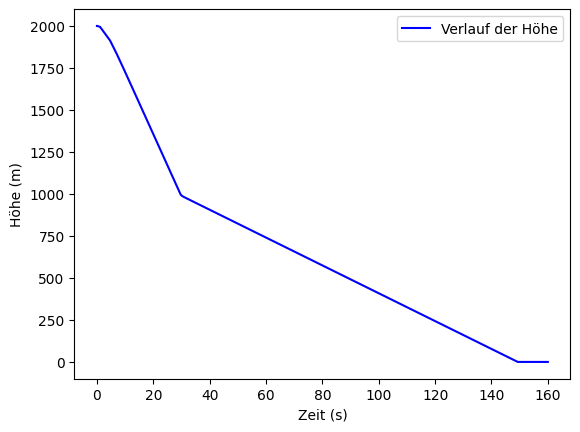

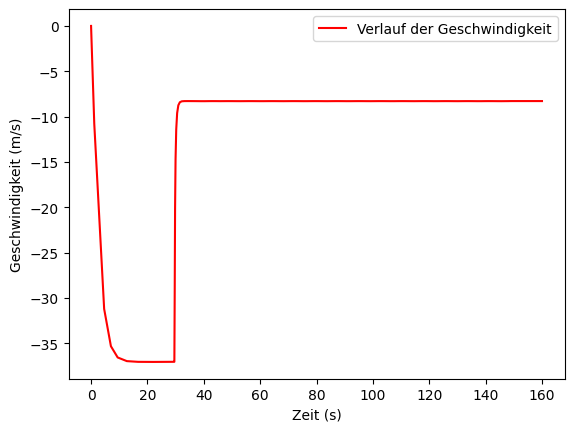

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def xpunkt_fallschirmspringer(t, x, m, g, cw, rhoL):
    if x[0] > 0:
        h = x[0]
        h_punkt = x[1]
        
        if h >= 1000:
            A = 1
        else:
            A = 20
            
        FG = m * g
        FL = 0.5 * cw * A * rhoL * (h_punkt**2) * np.sign(h_punkt)
        FB = -FG - FL
        h_2punkt = FB / m
        
        return [h_punkt, h_2punkt]
    else:
        return [0, 0]

# Parameter
m = 70
g = 9.81
cw = 1
rhoL = 1

# Solve
solution = solve_ivp(
    lambda t, x: xpunkt_fallschirmspringer(t, x, m, g, cw, rhoL),
    [0, 160],
    [2000, 0],
    method='RK45',
    dense_output=True
)

t = solution.t
x = solution.y
h = x[0, :]
h_punkt = x[1, :]

# Plot
plt.figure(1)
plt.plot(t, h, 'b-')
plt.legend(['Verlauf der Höhe'])
plt.xlabel('Zeit (s)')
plt.ylabel('Höhe (m)')

plt.figure(2)
plt.plot(t, h_punkt, 'r-')
plt.legend(['Verlauf der Geschwindigkeit'])
plt.xlabel('Zeit (s)')
plt.ylabel('Geschwindigkeit (m/s)')

plt.show()